In [ ]:
# install dtaidistance package by running this command <pip install dtaidistance>

In [ ]:
pip install dtaidistance

In [ ]:
#importing important libraries
import pandas as pd
import numpy as np
import math
from dtaidistance import dtw
import matplotlib.pyplot as plt
from datetime import datetime

In [ ]:
#reading csv file and printing it
df=pd.read_csv('PricingData.csv')
df

,Seat Fare Type 1,Seat Fare Type 2,Bus,Service Date,RecordedAt
0,"900.00,800.00",NaN,d6fa79179fda2a77455794637f225962,15-07-2020 00:00,11-07-2020 16:28
1,"910.00,833.00,795.00,762.00",NaN,d6fa79179fda2a77455794637f225962,15-07-2020 00:00,11-07-2020 19:17
2,"910.00,833.00,795.00,762.00",NaN,d6fa79179fda2a77455794637f225962,15-07-2020 00:00,12-07-2020 09:02
3,"910.00,833.00,795.00,762.00",NaN,d6fa79179fda2a77455794637f225962,15-07-2020 00:00,12-07-2020 10:05
4,"876.00,800.00,767.00,729.00",NaN,d6fa79179fda2a77455794637f225962,15-07-2020 00:00,13-07-2020 01:53
...,...,...,...,...,...
30644,"925.00,810.00",NaN,6ebe14c775a983e43b07c55e6b71d77d,30-07-2020 00:00,30-07-2020 07:59
30645,"925.00,810.00",NaN,6ebe14c775a983e43b07c55e6b71d77d,30-07-2020 00:00,30-07-2020 07:59
30646,"925.00,810.00",NaN,6ebe14c775a983e43b07c55e6b71d77d,30-07-2020 00:00,30-07-2020 08:08
30647,"925.00,810.00",NaN,6ebe14c775a983e43b07c55e6b71d77d,30-07-2020 00:00,30-07-2020 08:21


In [ ]:
#describing data to analyse it closely
df.describe()

,Seat Fare Type 1,Seat Fare Type 2,Bus,Service Date,RecordedAt
count,17785,12746,30649,30649,30649
unique,1119,233,117,16,12198
top,"800.00,750.00",0,5580f995d6f4d3bcceca7e2db6c77bf7,15-07-2020 00:00,20-07-2020 23:38
freq,589,4376,2418,2746,114


In [ ]:
#cleaning of rows contaning Seat Fare Type 2 value 0 beacuse they are anomalies & converting Seat Fare Type1 and 2 as strings
df=df[df["Seat Fare Type 2"]!='0']
df['Seat Fare Type 1']=df['Seat Fare Type 1'].astype(str)
df['Seat Fare Type 2']=df['Seat Fare Type 2'].astype(str)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
#spliting Seat Fare 1 in four Subcategories front back middle and upper as Category11 and so on and assigning to new dataframe
price_cat11=[]
price_cat12=[]
price_cat13=[]
price_cat14=[]
for i in df["Seat Fare Type 1"]:
  price_list=i.split(',')
  price_list_int=[float(x) for x in price_list]
  if(len(price_list_int)==4):
    price_cat11.append(price_list_int[0])
    price_cat12.append(price_list_int[1])
    price_cat13.append(price_list_int[2])
    price_cat14.append(price_list_int[3])
  elif(len(price_list_int)==3):
    price_cat11.append(price_list_int[0])
    price_cat12.append(price_list_int[1])
    price_cat13.append(price_list_int[2])
    price_cat14.append(float('nan'))
  elif(len(price_list_int)==2):
    price_cat11.append(price_list_int[0])
    price_cat12.append(price_list_int[1])
    price_cat13.append(float('nan'))
    price_cat14.append(float('nan'))
  elif(len(price_list_int)==1):
    price_cat11.append(float('nan'))
    price_cat12.append(float('nan'))
    price_cat13.append(float('nan'))
    price_cat14.append(price_list_int[0])
  else:
    price_cat11.append(float('nan'))
    price_cat12.append(float('nan'))
    price_cat13.append(float('nan'))
    price_cat14.append(float('nan'))
df["Category11"]=price_cat11
df["Category12"]=price_cat12
df["Category13"]=price_cat13
df["Category14"]=price_cat14
df.drop('Seat Fare Type 1',
  axis='columns', inplace=True)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

In [ ]:
#spliting Seat Fare 2 in four Subcategories front back middle and upper as Category11 and so on and assigning to new dataframe
price_cat21=[]
price_cat22=[]
price_cat23=[]
price_cat24=[]
for i in df["Seat Fare Type 2"]: 
  price_list=i.split(',')
  price_list_int=[float(x) for x in price_list]
  if(len(price_list_int)==4):
    price_cat21.append(price_list_int[0])
    price_cat22.append(price_list_int[1])
    price_cat23.append(price_list_int[2])
    price_cat24.append(price_list_int[3])
  elif(len(price_list_int)==3):
    price_cat21.append(price_list_int[0])
    price_cat22.append(price_list_int[1])
    price_cat23.append(price_list_int[2])
    price_cat24.append(float('nan'))
  elif(len(price_list_int)==2):
    price_cat21.append(price_list_int[0])
    price_cat22.append(price_list_int[1])
    price_cat23.append(float('nan'))
    price_cat24.append(float('nan'))
  elif(len(price_list_int)==1):
    price_cat21.append(float('nan'))
    price_cat22.append(float('nan'))
    price_cat23.append(float('nan'))
    price_cat24.append(price_list_int[0])
  else:
    price_cat21.append(float('nan'))
    price_cat22.append(float('nan'))
    price_cat23.append(float('nan'))
    price_cat24.append(float('nan'))
df["Category21"]=price_cat21
df["Category22"]=price_cat22
df["Category23"]=price_cat23
df["Category24"]=price_cat24
df.drop('Seat Fare Type 2',
  axis='columns', inplace=True)
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

,Bus,Service Date,RecordedAt,Category11,Category12,Category13,Category14,Category21,Category22,Category23,Category24
0,d6fa79179fda2a77455794637f225962,15-07-2020 00:00,11-07-2020 16:28,900.0,800.0,NaN,NaN,NaN,NaN,NaN,NaN
1,d6fa79179fda2a77455794637f225962,15-07-2020 00:00,11-07-2020 19:17,910.0,833.0,795.0,762.0,NaN,NaN,NaN,NaN
2,d6fa79179fda2a77455794637f225962,15-07-2020 00:00,12-07-2020 09:02,910.0,833.0,795.0,762.0,NaN,NaN,NaN,NaN
3,d6fa79179fda2a77455794637f225962,15-07-2020 00:00,12-07-2020 10:05,910.0,833.0,795.0,762.0,NaN,NaN,NaN,NaN
4,d6fa79179fda2a77455794637f225962,15-07-2020 00:00,13-07-2020 01:53,876.0,800.0,767.0,729.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
30644,6ebe14c775a983e43b07c55e6b71d77d,30-07-2020 00:00,30-07-2020 07:59,925.0,810.0,NaN,NaN,NaN,NaN,NaN,NaN
30645,6ebe14c775a983e43b07c55e6b71d77d,30-07-2020 00:00,30-07-2020 07:59,925.0,810.0,NaN,NaN,NaN,NaN,NaN,NaN
30646,6ebe14c775a983e43b07c55e6b71d77d,30-07-2020 00:00,30-07-2020 08:08,925.0,810.0,NaN,NaN,NaN,NaN,NaN,NaN
30647,6ebe14c775a983e43b07c55e6b71d77d,30-07-2020 00:00,30-07-2020 08:21,925.0,810.0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# now finding unique bus ids and collecting their prices at every instances in a list and assigning to data frame and nan value is where seat is not available
unique_bus_id=df["Bus"].unique()
data=pd.DataFrame(unique_bus_id,columns=['Unique_Bus_Service'])
data['Category11'] = data.apply(lambda x: [], axis=1)
data['Category12'] = data.apply(lambda x: [], axis=1)
data['Category13'] = data.apply(lambda x: [], axis=1)
data['Category14'] = data.apply(lambda x: [], axis=1)
data['Category21'] = data.apply(lambda x: [], axis=1)
data['Category22'] = data.apply(lambda x: [], axis=1)
data['Category23'] = data.apply(lambda x: [], axis=1)
data['Category24'] = data.apply(lambda x: [], axis=1)
data['Time_Record'] = data.apply(lambda x: [], axis=1)
for j in range(len(unique_bus_id)):
  p_cat11=[]
  p_cat12=[]
  p_cat13=[]
  p_cat14=[]
  p_cat21=[]
  p_cat22=[]
  p_cat23=[]
  p_cat24=[]
  t_cat1=[]
  t=[]
  for i in range(len(df["Bus"])):
    if(df.iloc[i]["Bus"]==unique_bus_id[j]):
      t.append(df.iloc[i]["RecordedAt"])
      p_cat11.append(df.iloc[i]["Category11"])
      p_cat12.append(df.iloc[i]["Category12"])
      p_cat13.append(df.iloc[i]["Category13"])
      p_cat14.append(df.iloc[i]["Category14"])
      p_cat21.append(df.iloc[i]["Category21"])
      p_cat22.append(df.iloc[i]["Category22"])
      p_cat23.append(df.iloc[i]["Category23"])
      p_cat24.append(df.iloc[i]["Category24"])
  data.at[j,"Category11"]=p_cat11 
  data.at[j,"Category12"]=p_cat12 
  data.at[j,"Category13"]=p_cat13 
  data.at[j,"Category14"]=p_cat14 
  data.at[j,"Category21"]=p_cat21 
  data.at[j,"Category22"]=p_cat22 
  data.at[j,"Category23"]=p_cat23 
  data.at[j,"Category24"]=p_cat24  
  data.at[j,"Time_Record"]=t  

In [ ]:
#displaying new dataframe with 78 unique bus ids and prices of different categories
data

,Unique_Bus_Service,Category11,Category12,Category13,Category14,Category21,Category22,Category23,Category24,Time_Record
0,d6fa79179fda2a77455794637f225962,"[900.0, 910.0, 910.0, 910.0, 876.0, nan, 876.0...","[800.0, 833.0, 833.0, 833.0, 800.0, nan, 800.0...","[nan, 795.0, 795.0, 795.0, 767.0, nan, 767.0, ...","[nan, 762.0, 762.0, 762.0, 729.0, 600.0, 729.0...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[11-07-2020 16:28, 11-07-2020 19:17, 12-07-202..."
1,4a2864d951d93bbfb4d7ac6a4eb40a75,"[999.0, 999.0, 999.0, 999.0, 999.0, 999.0, 999...","[949.0, 949.0, 949.0, 949.0, 949.0, 849.0, 849...","[1090.0, 1090.0, 1090.0, 1090.0, 1090.0, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[14-07-2020 19:00, 15-07-2020 02:40, 15-07-202..."
2,ca5a5dcf590a304de20107f2f119fe4d,"[nan, nan, nan, 690.0, 690.0, 690.0, 990.0, 99...","[nan, nan, nan, 650.0, 650.0, 650.0, 950.0, 95...","[nan, nan, nan, 600.0, 600.0, 600.0, 900.0, 90...","[810.0, 810.0, 810.0, nan, nan, nan, nan, nan,...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[15-06-2020 21:16, 16-06-2020 14:37, 22-06-202..."
3,dcb5420e873f5bb322abf4cece991b03,"[800.0, 800.0, 800.0, 800.0, 800.0, 800.0, 800...","[750.0, 750.0, 750.0, 750.0, 750.0, 750.0, 750...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[12-07-2020 18:45, 13-07-2020 09:25, 14-07-202..."
4,9d2a5d655e5000921f3591f6cd7908d3,"[950.0, 950.0, 950.0, 950.0, 950.0, 850.0, 850...","[900.0, 900.0, 900.0, 900.0, 900.0, 800.0, 800...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[10-07-2020 05:00, 10-07-2020 10:07, 11-07-202..."
...,...,...,...,...,...,...,...,...,...,...
73,52725e18d5c8af87b097a33ca2282a10,"[829.0, 829.0, 829.0, 829.0, 829.0, 799.0, 799...","[779.0, 779.0, 779.0, 779.0, 779.0, 749.0, 749...","[729.0, 729.0, 729.0, 729.0, 729.0, 699.0, 699...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[02-07-2020 04:44, 02-07-2020 10:24, 03-07-202..."
74,29b77a9e58d23bf43daa780eb8b7db65,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[899.0, 899.0, 899.0, 899.0, 899.0, 899.0, 899...","[799.0, 799.0, 799.0, 799.0, 799.0, 799.0, 799...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[09-07-2020 10:22, 14-07-2020 07:07, 21-07-202..."
75,241f07f1fafbd5405c0139ae4a148a74,"[nan, nan, 599.0, 599.0, nan, nan, 599.0, 599....","[nan, nan, 550.0, 550.0, nan, nan, 550.0, 550....","[nan, nan, 500.0, 500.0, nan, nan, 500.0, 500....","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, 

In [ ]:
# defining a sorting algo to sort the prices list in a ascending order with respect to date
def sorting_price_list(x,y):
  sorted_time_list=[]
  sorted_price_list=[] 
  for j in range(len(x)):
    sorted_time_list.append(min(x))
    sorted_price_list.append(y[x.index(min(x))])
    y.remove(y[x.index(min(x))])
    x.remove(min(x))
  return(sorted_time_list,sorted_price_list)

In [ ]:
def remove_nan_value_formate_date(x):
  # sorting prices of according to date in ascending order and converting Recorded Time columns data as datetme format
  non_nan_list1=[]
  plt.figure(figsize=(15, 5))
  plt.xlabel("Date")
  plt.ylabel("Seat_Price_"+x)
  plt.title("Sample Time Series Plot")
  for i in range(len(data["Unique_Bus_Service"])):
    non_nan_price=[]
    non_nan_time=[]
    for (j,k) in zip(data.iloc[i][x],data.iloc[i]["Time_Record"]):
      if(not math.isnan(float(j))):
        non_nan_price.append(float(j))
        l=k.split(' ')[0].split('-')
        non_nan_time.append(datetime.fromisoformat(l[2]+'-'+l[1]+'-'+l[0]+' '+k.split(' ')[1]))
    (a,b)=sorting_price_list(non_nan_time,non_nan_price)
    non_nan_list1.append(b)
    # plotting time series graph comparing categorie11 prices of every buses 
    plt.plot(a,b,linewidth=1)
  return non_nan_list1 

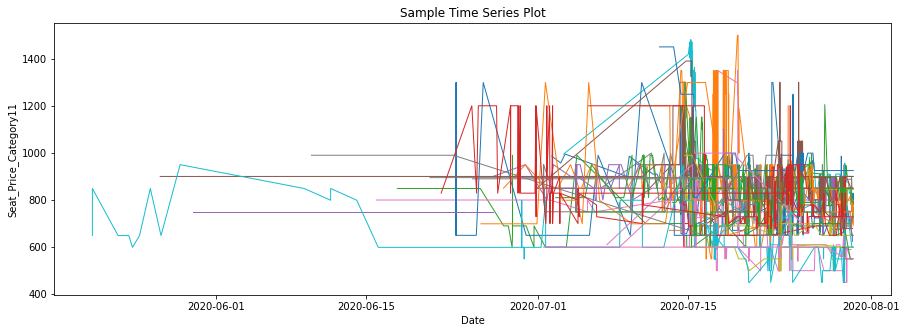

In [ ]:
#plotting time series graph of category11 by calling function
non_nan_list1=remove_nan_value_formate_date("Category11")

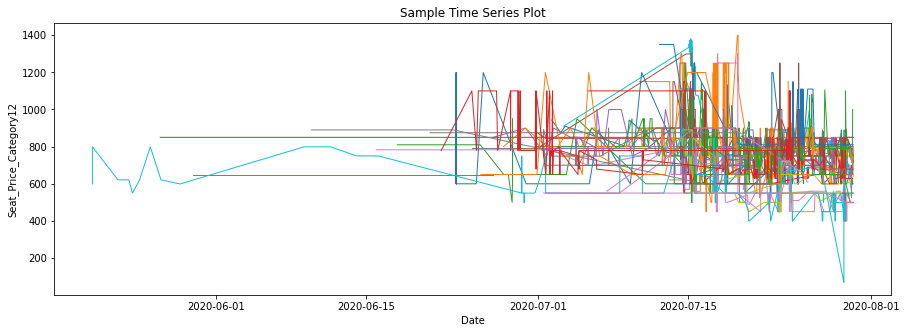

In [ ]:
#plotting time series graph of category12 by calling function
non_nan_list1=remove_nan_value_formate_date("Category12")

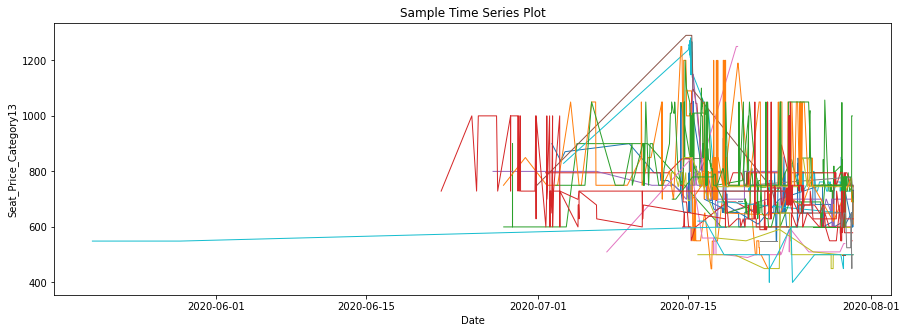

In [ ]:
#plotting time series graph of category13 by calling function
non_nan_list1=remove_nan_value_formate_date("Category13")

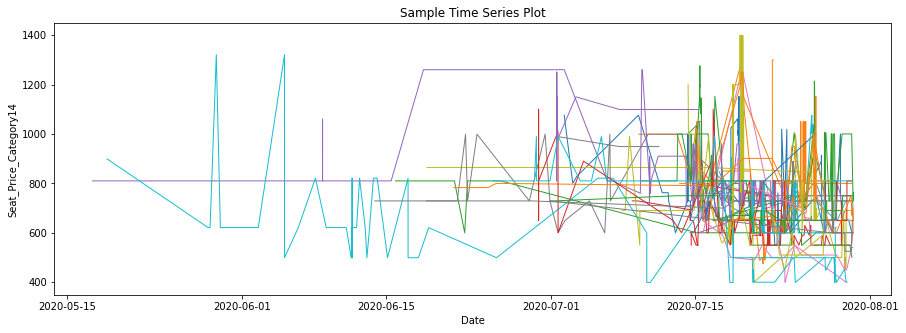

In [ ]:
#plotting time series graph of category14 by calling function
non_nan_list1=remove_nan_value_formate_date("Category14")

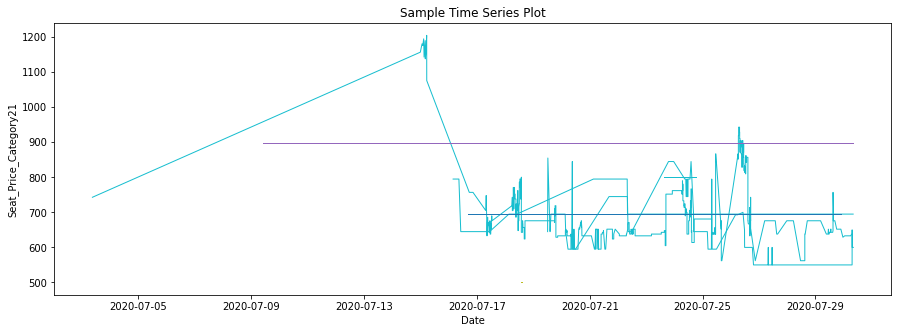

In [ ]:
#plotting time series graph of category21 by calling function
non_nan_list1=remove_nan_value_formate_date("Category21")

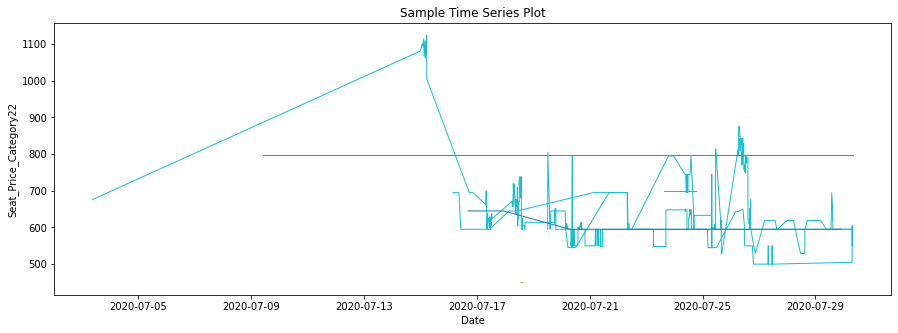

In [ ]:
#plotting time series graph of category22 by calling function
non_nan_list1=remove_nan_value_formate_date("Category22")

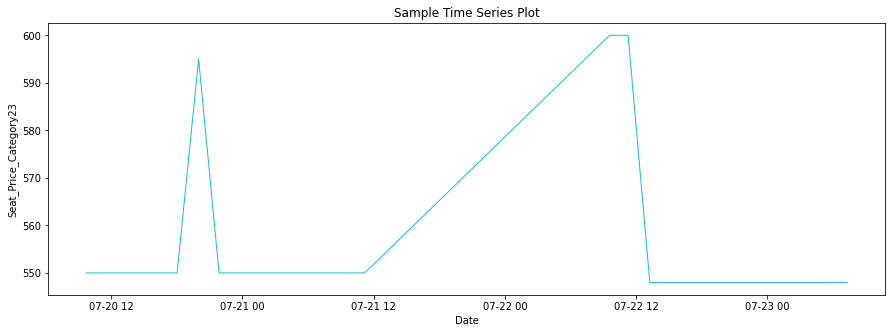

In [ ]:
#plotting time series graph of category23 by calling function
non_nan_list1=remove_nan_value_formate_date("Category23")

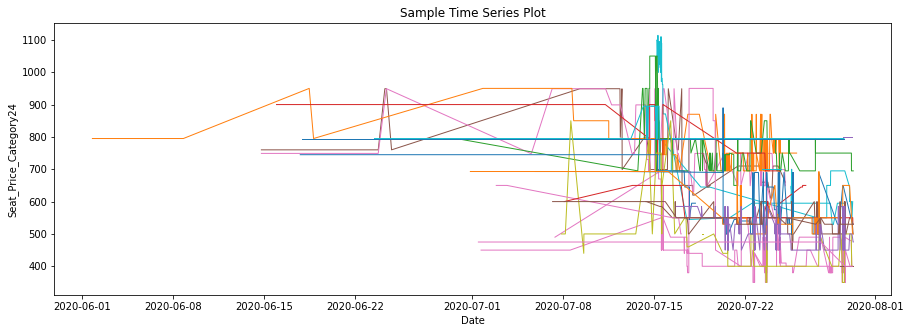

In [ ]:
#plotting time series graph of category24 by calling function
non_nan_list1=remove_nan_value_formate_date("Category24")

In [ ]:
# this function computes dynamic time wrapping distance between time series of individual categories and -1 values are replaced by max_distance in the list +1000 if ma_value is defined else 1000
def dtw_comparison(pl):
  dtw_distance_comp=[]
  for i in range(len(pl)):
    dtw_distance_a=[]
    for j in range(len(pl)):
        if(i!=j):
            if(not math.isinf(dtw.distance(pl[i],pl[j]))):
              dtw_distance_a.append(dtw.distance(pl[i],pl[j]))
            else:
              dtw_distance_a.append(-1)

    maximum_sum_assumed=max(dtw_distance_a)
    if(maximum_sum_assumed==-1):
      maximum_sum_assumed=1000
    arr=np.asarray(dtw_distance_a)
    arr[ arr == -1] = maximum_sum_assumed         
    dtw_distance_comp.append(arr)
  return dtw_distance_comp    

In [ ]:
# function call to get dtw distance compared list
# note category21,category22,category23 are ignored as it contains very less data 
dtw_comparison_list1=dtw_comparison(non_nan_list1)
dtw_comparison_list2=dtw_comparison(non_nan_list2)
dtw_comparison_list3=dtw_comparison(non_nan_list3)
dtw_comparison_list4=dtw_comparison(non_nan_list4)
dtw_comparison_list8=dtw_comparison(non_nan_list8)

In [ ]:
# summing up the distaces of categories and producing final sums list
final_dtw_sum_list=[]
for i in range(len(dtw_comparison_list1)):
  final_dtw_sum_list.append(np.sum(np.array([dtw_comparison_list1[i],dtw_comparison_list2[i],dtw_comparison_list3[i],dtw_comparison_list4[i],dtw_comparison_list8[i]]),axis=0)) 

In [ ]:
# now we will find min value of dtw distance in list as a most closest follower bus
index_of_min_element=[]
min_distance_list=[]
for i in range(len(final_dtw_sum_list)):
  min_distance=min(final_dtw_sum_list[i])
  min_distance_list.append(min_distance)
  index_of_min_element.append(list(final_dtw_sum_list[i]).index(min_distance)+1)

In [ ]:
# normalising the dtw distance with a formula (M-S(x,y))/M
normalisation_list=[]
max_value_distance=max(min_distance_list)
def dtw_distance_normalisation():
  for i in range(len(min_distance_list)):
    normalisation_list.append((max_value_distance-min_distance_list[i])/max_value_distance)
  return(normalisation_list)    

In [ ]:
#defining sigmoid to calculate confidence scores
def sigmoid(x):
  return (1/(1+np.exp(-x)))
confidence_scorelist=[]
normalised_list=dtw_distance_normalisation()
for i in range(len(normalised_list)):
  confidence_scorelist.append(sigmoid(normalised_list[i]))

In [ ]:
# creating new data frame and setting the unique buses a 1st column and then follower and their confidence score
output_data=pd.DataFrame()
output_data["Bus_Service"]=data["Unique_Bus_Service"]
list_follower=[]
list_of_follows=[]
follows_confidence_list=[]
for i in range(len(data["Unique_Bus_Service"])):
  list_follower.append(data.iloc[index_of_min_element[i]]["Unique_Bus_Service"])
output_data["Is followed by"]=list_follower
output_data["Confidence Score (0 to 1)"]=confidence_scorelist
for i in range(len(output_data["Bus_Service"])):
  for j in range(len(output_data["Bus_Service"])):
    if(output_data.iloc[i]["Bus_Service"]==output_data.iloc[j]["Is followed by"]):
      list_of_follows.append(output_data.iloc[j]["Is followed by"])
      follows_confidence_list.append(output_data.iloc[j]["Confidence Score (0 to 1)"])
output_data["Follows"]=list_of_follows
output_data["Confidence Score (0 to 1) 2"]=follows_confidence_list
print(output_data)

                         Bus_Service  ... Confidence Score (0 to 1) 2
0   d6fa79179fda2a77455794637f225962  ...                    0.638805
1   4a2864d951d93bbfb4d7ac6a4eb40a75  ...                    0.639633
2   ca5a5dcf590a304de20107f2f119fe4d  ...                    0.610307
3   dcb5420e873f5bb322abf4cece991b03  ...                    0.662280
4   9d2a5d655e5000921f3591f6cd7908d3  ...                    0.658114
..                               ...  ...                         ...
73  52725e18d5c8af87b097a33ca2282a10  ...                    0.675887
74  29b77a9e58d23bf43daa780eb8b7db65  ...                    0.667710
75  241f07f1fafbd5405c0139ae4a148a74  ...                    0.680357
76  23c7bd7bcab9a19b7da7cae4e3d4659a  ...                    0.683518
77  1d5363d20e0f4941bdf3084f131938b2  ...                    0.682857

[78 rows x 5 columns]


In [ ]:
output_data.to_csv('Output_Data.csv', sep='\t', index=False,header=True)